# Assignment A1b - Functions and Computation
---
### Ryan Lin


## Imports

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gabor import *
from trig import *

## 1a sinewave

In [2]:
sinewave(0.0, f=5, d=0.05)

-1.0

## 1b gabor


spatial signal

In [3]:
def test_gaussian_envelope_center():
    sigma = 1.0
    val_at_zero = gaussian_envelope(0, sigma)
    assert np.isclose(val_at_zero, 1.0), f"Expected 1.0, got {val_at_zero}"
    print("test_gaussian_envelope_center: PASSED")

test_gaussian_envelope_center()


test_gaussian_envelope_center: PASSED


In [4]:
def test_gaussian_envelope_symmetry():
    sigma = 1.0
    t_vals = np.linspace(-3, 3, 10)
    for t in t_vals:
        pos_val = gaussian_envelope(t, sigma)
        neg_val = gaussian_envelope(-t, sigma)
        assert np.isclose(pos_val, neg_val), f"Asymmetry at t={t}"
    print("test_gaussian_envelope_symmetry: PASSED")

test_gaussian_envelope_symmetry()


test_gaussian_envelope_symmetry: PASSED


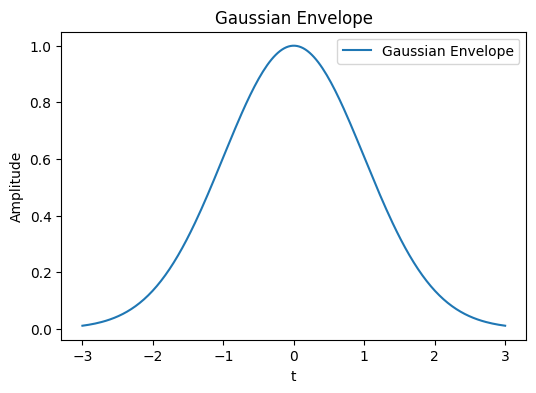

In [5]:
t_plot = np.linspace(-3, 3, 200)
sigma = 1.0
env_vals = gaussian_envelope(t_plot, sigma)

plt.figure(figsize=(6,4))
plt.plot(t_plot, env_vals, label='Gaussian Envelope')
plt.title("Gaussian Envelope")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [6]:
def test_gabor_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 2
    a = 2.0
    val_at_zero = gabor(0, sigma, f, phi, a)
    expected = a * np.cos(phi)  # = 2.0 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gabor_value_at_zero: PASSED")

test_gabor_value_at_zero()


test_gabor_value_at_zero: PASSED


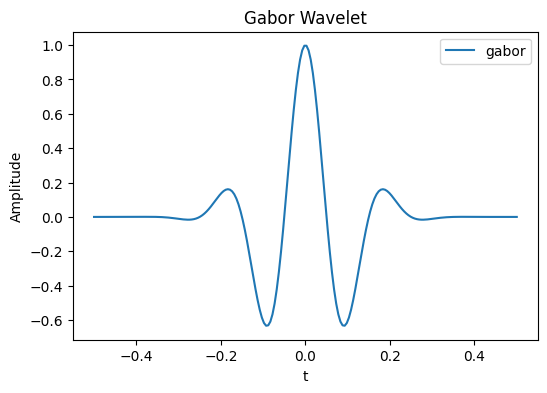

In [7]:
t_plot = np.linspace(-0.5, 0.5, 200)
sigma = 0.1
f = 5.0
phi = 0
a = 1

gabor_vals = gabor(t_plot, sigma, f, phi, a)
plt.figure(figsize=(6,4))
plt.plot(t_plot, gabor_vals, label='gabor')
plt.title("Gabor Wavelet")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [8]:
def test_gaboro_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = 0
    a = 2.0
    val_at_zero = gaboro(t=0, sigma=sigma,f=f, phi=phi, a=a)
    expected = a * np.sin(phi)  # = 2 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gaboro_value_at_zero: PASSED")

test_gaboro_value_at_zero()


test_gaboro_value_at_zero: PASSED


In [9]:
def test_gabore_equivalence():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 3
    a = 1.5
    test_ts = np.linspace(-1, 1, 100)

    for tt in test_ts:
        val_gabore = gabore(tt, sigma, f, phi, a)
        val_gabor  = gabor(tt, sigma, f, phi, a)
        assert np.isclose(val_gabore, val_gabor), "Mismatch between gabore and gabor"
    print("test_gabore_equivalence: PASSED")

test_gabore_equivalence()


test_gabore_equivalence: PASSED


In [14]:
def test_gabor_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000  # sampling frequency for numerical integration
    d = 0

    norm_const = gabor_norm(f, sigma, fs, d)

    # Recreate the time axis (same approach as gabor_norm)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    # Construct the raw wavelet (cos-based) for testing
    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)

    # Multiply by normalizing constant
    normed_values = norm_const * g_values

    # Numerically integrate the square
    energy = np.trapz(normed_values**2, t)

    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabor_norm: PASSED (energy={energy:.5f})")

test_gabor_norm()


test_gabor_norm: PASSED (energy=1.00000)


In [15]:
def test_gabore_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gabore_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapz(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabore_norm: PASSED (energy={energy:.5f})")

test_gabore_norm()


test_gabore_norm: PASSED (energy=1.00000)


In [16]:
def test_gaboro_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gaboro_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.sin(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapz(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gaboro_norm: PASSED (energy={energy:.5f})")

test_gaboro_norm()


test_gaboro_norm: PASSED (energy=1.00000)


## 1c gammatone

cochlear signal

In [10]:
def erb(f):
    return 24.7*((4.37 * f)/1000) + 1

def bandwidth(f):
    return 1.019 * erb(f)

def gammatone(t, f=1.0, n=4, d=0.0, a=1.0):
    t = np.maximum(t,0) # t >= 0
    b = bandwidth(f)
    return a * (t**(n-1)) * np.exp(-2 * np.pi * b * t) * sinewave(t, f, np.pi/2) #cosine is 2 pi

def gammatone_norm(f=1.0, n=4, fs=1000):
    t = np.linspace(0, 0.1, int(0.1 * fs))  # 0 to 0.1 seconds
    g = gammatone(t, f, n, 0.0, 1.0)
    return 1 / np.sqrt(np.sum(g**2))


## 2a localmaxima

In [11]:
def localmaxima(signal):
    """
    Find the indices of local maxima in a 1D signal.

    Parameters:
    signal : array-like
        The input 1D array.

    Returns:
    list
        A list of indices where local maxima occur.
    """
    # Convert input to NumPy array for easy slicing
    signal = np.asarray(signal)

    # Initialize an empty list to store indices of local maxima
    maxima_indices = []

    # Iterate through the array, ignoring the first and last elements (edges)
    for i in range(1, len(signal) - 1):
        # Check if the current element is a local maximum
        if signal[i - 1] < signal[i] > signal[i + 1]:
            maxima_indices.append(i)

    return maxima_indices


## 2b crossings

In [12]:
def threshold_crossings(signal, threshold, direction="both"):
    """
    Find the indices of threshold crossings in a 1D signal.

    Parameters:
    signal : array-like
        The input 1D array.
    threshold : float
        The threshold value to check crossings against.
    direction : str, optional
        The direction of the crossings to detect:
        - "negpos": Crossings from below the threshold to equal to or greater than the threshold.
        - "posneg": Crossings from equal to or greater than the threshold to below the threshold.
        - "both": Crossings in either direction.
        Default is "both".

    Returns:
    numpy.ndarray
        An array of indices where threshold crossings occur.
    """
    # Convert signal to a NumPy array
    signal = np.asarray(signal)
    
    # Initialize crossings
    crossings = []

    # Compute the conditions for each direction
    if direction == "negpos":
        # Crossing from below to above or equal
        crossings = np.where((signal[:-1] < threshold) & (signal[1:] >= threshold))[0] + 1
    elif direction == "posneg":
        # Crossing from above or equal to below
        crossings = np.where((signal[:-1] >= threshold) & (signal[1:] < threshold))[0] + 1
    elif direction == "both":
        # Crossing in either direction
        negpos_crossings = np.where((signal[:-1] < threshold) & (signal[1:] >= threshold))[0] + 1
        posneg_crossings = np.where((signal[:-1] >= threshold) & (signal[1:] < threshold))[0] + 1
        crossings = np.sort(np.concatenate((negpos_crossings, posneg_crossings)))
    else:
        raise ValueError("Invalid direction. Must be 'negpos', 'posneg', or 'both'.")

    return crossings


## 2c envelope

In [13]:
def envelope(y, nblocks=None):
    """
    Compute the lower and upper bounds of a waveform in `nblocks` blocks.

    Parameters:
    y : array-like
        The input waveform or vector.
    nblocks : int, optional
        Number of blocks to divide `y` into. Default is 1/10th the length of `y`.

    Returns:
    tuple:
        - ylower : numpy.ndarray
            Array of lower bounds for each block.
        - yupper : numpy.ndarray
            Array of upper bounds for each block.
        - blockindices : numpy.ndarray
            Array of starting indices for each block.
    """
    # Convert input to a NumPy array
    y = np.asarray(y)
    
    # Set default for `nblocks` if not provided
    if nblocks is None:
        nblocks = max(1, len(y) // 10)  # Default to 1/10th the length of `y`

    # Compute the size of each block
    block_size = len(y) // nblocks

    # Compute the starting indices for each block
    blockindices = np.arange(0, len(y), block_size)

    # Initialize lower and upper bounds arrays
    ylower = []
    yupper = []

    # Compute lower and upper bounds for each block
    for i in range(len(blockindices)):
        start = blockindices[i]
        end = blockindices[i + 1] if i + 1 < len(blockindices) else len(y)  # Handle last block
        block = y[start:end]
        ylower.append(np.min(block))  # Lower bound
        yupper.append(np.max(block))  # Upper bound

    return np.array(ylower), np.array(yupper), blockindices
